In [42]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

In [43]:
df = pd.read_csv('C:/Users/HP/Py Code/ML/Data/package.csv')

In [44]:
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [45]:
X = df.iloc[:,:-1]

In [46]:
y= df.iloc[:,-1]

In [47]:
y.dtype

dtype('float64')

In [48]:
type(y)

pandas.core.series.Series

In [49]:
X1= X.to_numpy()

In [50]:
X= torch.from_numpy(X1.astype(np.float32))

In [51]:
y1= y.to_numpy()

In [52]:
y =torch.from_numpy(y1.astype(np.float32))

In [53]:
y=y.view(y.shape[0],1)

In [54]:
n_samples, n_features = X.shape

In [ ]:
X.shape

torch.Size([200, 1])

In [31]:
y.shape

torch.Size([200, 1])

In [32]:
input_size= n_features
output_size= 1

In [33]:
model = nn.Linear(input_size,output_size)

In [39]:
loss_fn= nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=.001)
num_epoch=10

In [40]:
total_loss = 0.0
num_samples = 0
true_values = []
predicted_values = []

In [41]:
for epoch in range(num_epoch):
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    total_loss += loss.item()
    num_samples += X.size(0)
    
    true_values.extend(y.tolist())  # For r2_scroe: Assuming y is a tensor
    predicted_values.extend(y_pred.tolist())  # For r2_scroe: Assuming y_pred is a tensor

    if (epoch + 1) % 10 == 0:
        print(f'epoch: {epoch + 1},\tMSE Loss = {total_loss/num_samples:.4f}')

# Calculate the final MSE loss after all epochs
final_mse = total_loss/num_samples
r2 = r2_score(true_values, predicted_values)

print(f'Final MSE Loss: {final_mse:.4f}')
print(f'R-squared (R2): {r2:.4f}')

epoch: 10,	MSE Loss = 0.1816


NameError: name 'r2_score' is not defined

In [37]:
pred = model(X).detach().numpy()

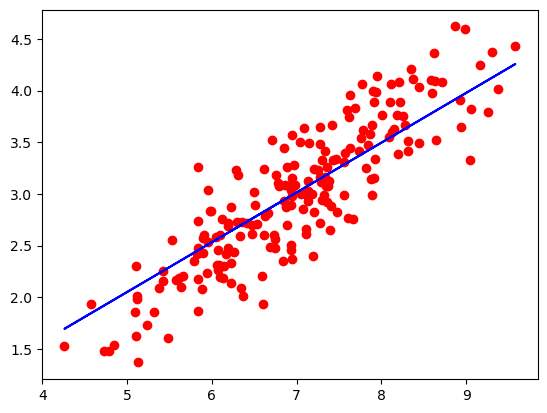

In [21]:
plt.plot(X, y, 'ro')
plt.plot(X, pred, 'b')
plt.show()